In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import sys
import rebound
sys.path.insert(1, '../SPOCKalt')
import plotFunctions
import simsetup

dataset = pd.read_csv('../modeldata/tryThetaSTDunwrap.csv')


In [2]:
dataset = pd.read_csv('../modeldata/addApprocInst.csv')

In [3]:
dataset.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,ThetaSTD,p2/1,p3/2,logInstT3BR,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time
count,138543.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,138543.000000,131150.000000,138543.000000,138543.000000,44860.000000,138543.000000,138543.000000,138543.000000,1.385430e+05,1.385430e+05
mean,69271.000000,6.232303,1.215945,1.359796,8.319864e+09,0.501295,13.368637,1.418755,1.422836,4.673141,0.150181,0.362667,0.578510,2.863147e+08,2.925407e+08
std,39994.063509,11.516257,3.124624,14.562645,3.010634e+12,0.381965,24.212453,0.340741,0.345986,1.377610,0.112919,0.203083,0.349974,4.371732e+08,4.417942e+08
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000003,0.003778,1.007289,1.006925,-1.775948,0.004612,0.006545,0.012454,3.464102e-02,0.000000e+00
25%,34635.500000,1.978115,0.006879,0.159031,5.782035e-04,0.091313,0.347063,1.166666,1.166752,3.815438,0.072493,0.201376,0.315946,6.485543e+04,5.858617e+04
50%,69271.000000,2.005367,0.041101,0.444107,4.237097e-03,0.502829,1.063887,1.307033,1.310603,4.614141,0.118127,0.320830,0.500692,1.484704e+06,1.498063e+06
75%,103906.500000,3.345559,0.466819,1.217691,2.582538e-02,0.910490,16.073656,1.586583,1.590345,5.510866,0.186970,0.491676,0.761991,1.000000e+09,1.000000e+09
max,138542.000000,130.498145,38.305852,2302.130815,1.090290e+15,0.999997,438.212098,3.251143,3.117589,11.858750,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09


In [4]:
dataset['logInstT3BR'].fillna(-2,inplace=True)

/tmp/ipykernel_138188/1996034711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['logInstT3BR'].fillna(-2,inplace=True)


In [5]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

In [6]:
%%time
if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
    #dataset['tmax'] = dataset.apply(tmax, axis=1)
    # dataset['tmax'] = dataset.apply(lambda x:1e4, axis=1) # this version would just set tmax=1e4 for all of them

    #dataset.to_csv(trainingdatafolder+"trainingdata.csv", encoding='ascii')

CPU times: user 5.94 s, sys: 25 ms, total: 5.96 s
Wall time: 5.96 s


In [7]:
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [8]:
filtData.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,ThetaSTD,p2/1,p3/2,logInstT3BR,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time,hasnull
count,131150.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,1.311500e+05,131150.0
mean,71773.100252,6.232303,1.215945,1.359796,8.319864e+09,0.500623,13.368637,1.425611,1.428627,0.058493,0.154347,0.366099,0.588217,3.023789e+08,3.089538e+08,0.0
std,38971.670160,11.516257,3.124624,14.562645,3.010634e+12,0.379235,24.212453,0.340437,0.345518,3.218163,0.113175,0.202511,0.350999,4.438412e+08,4.483993e+08,0.0
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000033,0.003778,1.008302,1.006925,-2.000000,0.004612,0.020136,0.032324,5.507922e+00,0.000000e+00,0.0
25%,39048.250000,1.978115,0.006879,0.159031,5.782035e-04,0.095017,0.347063,1.169349,1.168768,-2.000000,0.076399,0.205595,0.325232,9.760101e+04,9.003296e+04,0.0
50%,72189.500000,2.005367,0.041101,0.444107,4.237097e-03,0.501470,1.063887,1.318943,1.319531,-2.000000,0.122961,0.325190,0.510735,2.335529e+06,2.337539e+06,0.0
75%,105355.750000,3.345559,0.466819,1.217691,2.582538e-02,0.905400,16.073656,1.597182,1.598911,3.712073,0.197317,0.495352,0.773136,1.000000e+09,1.000000e+09,0.0
max,138542.000000,130.498145,38.305852,2302.130815,1.090290e+15,0.999978,438.212098,3.251143,3.117589,11.858750,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09,0.0


In [9]:
plot = filtData

In [10]:
plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()
plot = plot.drop(plot[plot['dup']==True].index)
plot = plot.drop(plot[plot['threeBRfillfac'] >20].index)
#plot = plot.drop(plot[plot['nearThetaSTD']>2].index)
# plot = plot.drop(plot[plot['3/2_order']>70].index)
# plot = plot.drop(plot[plot['MMRstrengthnear']<.5].index)


/tmp/ipykernel_126685/258478185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()


In [11]:
plot.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,ThetaSTD,p2/1,p3/2,logInstT3BR,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time,hasnull
count,119880.000000,119880.000000,119880.000000,119880.000000,1.198800e+05,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,1.198800e+05,1.198800e+05,119880.0
mean,69816.334785,6.179252,1.200631,1.096094,9.100715e+09,0.501177,13.625561,1.427084,1.430783,0.030788,0.155716,0.366899,0.591156,3.085340e+08,3.148881e+08,0.0
std,39155.046341,11.471516,3.112483,1.877771,3.148971e+12,0.378707,24.516742,0.340309,0.345537,3.210137,0.113880,0.202277,0.352445,4.465440e+08,4.508915e+08,0.0
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000033,0.003778,1.009586,1.022473,-2.000000,0.006381,0.025996,0.049489,5.507922e+00,0.000000e+00,0.0
25%,36330.750000,1.978491,0.006605,0.156153,5.479604e-04,0.096179,0.351413,1.170805,1.170553,-2.000000,0.076980,0.206672,0.327362,1.010639e+05,9.318961e+04,0.0
50%,70228.500000,2.004830,0.039886,0.436129,4.076840e-03,0.503123,1.084701,1.321844,1.322354,-2.000000,0.125402,0.326460,0.513611,2.561108e+06,2.583093e+06,0.0
75%,103286.250000,3.262400,0.443206,1.190294,2.494031e-02,0.905011,16.748533,1.599797,1.602215,3.690626,0.201186,0.496002,0.776466,1.000000e+09,1.000000e+09,0.0
max,138542.000000,130.498145,38.305852,19.994304,1.090290e+15,0.999978,438.212098,3.251143,3.117589,11.858750,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09,0.0


In [12]:
import math
import numpy as np

In [13]:
import numpy as np
def plotfill(x):
    #can roughly add 6 for the ignored term
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = math.sqrt(-np.log(1-(x**(-1))))
    return p1+p2+6

In [14]:
plotfill(1.1)

8.527817549124276

In [15]:
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: (x), y))

/tmp/ipykernel_126685/4243788301.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.8)


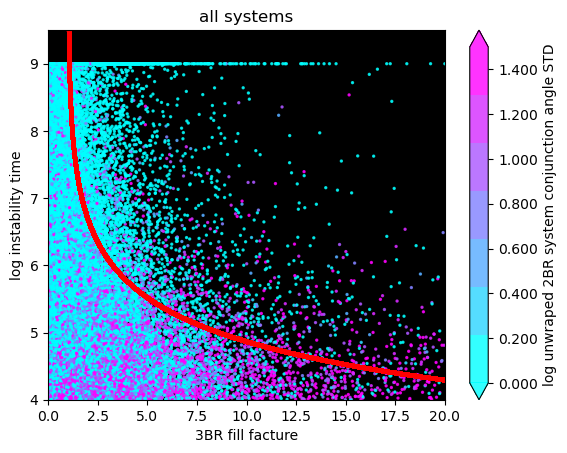

In [16]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
plt.title("all systems")
cbar.set_label('log unwraped 2BR system conjunction angle STD')
ax.set_facecolor("black")


In [17]:
noNan = plot.drop(plot[plot['logInstT3BR'] <0].index)


In [18]:
noNan.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,ThetaSTD,p2/1,p3/2,logInstT3BR,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time,hasnull
count,35302.000000,35302.000000,35302.000000,35302.000000,3.530200e+04,35302.000000,35302.000000,35302.000000,35302.000000,35302.000000,35302.000000,35302.000000,35302.000000,3.530200e+04,3.530200e+04,35302.0
mean,74797.455640,9.010414,1.984865,2.944888,3.090393e+10,0.340609,14.212481,1.381988,1.202188,4.896235,0.077783,0.283018,0.384364,1.031420e+08,1.062282e+08,0.0
std,36685.788552,13.104675,3.577779,2.639206,5.802864e+12,0.361697,22.513523,0.338610,0.207510,1.200238,0.040703,0.187850,0.219877,2.905318e+08,2.956344e+08,0.0
min,22.000000,-0.430259,0.000006,0.101580,4.910079e-04,0.000033,0.012535,1.009586,1.022473,1.589424,0.006381,0.025996,0.049489,5.507922e+00,0.000000e+00,0.0
25%,43670.750000,1.995838,0.013183,1.364127,2.157544e-02,0.026642,0.387482,1.127457,1.087363,4.025527,0.046766,0.139916,0.215680,3.113341e+04,2.547294e+04,0.0
50%,75160.500000,2.227072,0.167411,2.013364,5.292567e-02,0.154943,1.323918,1.266442,1.137823,4.756950,0.069100,0.230896,0.333897,1.375287e+05,1.290536e+05,0.0
75%,105766.250000,10.185167,2.359895,3.431486,1.507776e-01,0.692263,20.752898,1.538148,1.222547,5.620168,0.100653,0.384200,0.504587,2.099895e+06,2.026668e+06,0.0
max,138538.000000,122.705516,36.367283,19.994304,1.090290e+15,0.999842,186.294590,3.104490,2.870713,11.858750,0.312347,1.128154,1.529849,1.000050e+09,1.000050e+09,0.0


/tmp/ipykernel_126685/1672901348.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((noNan['logInstT3BR']),np.log10(noNan['instability_time']), s=2, c=(np.log10(noNan['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.6)


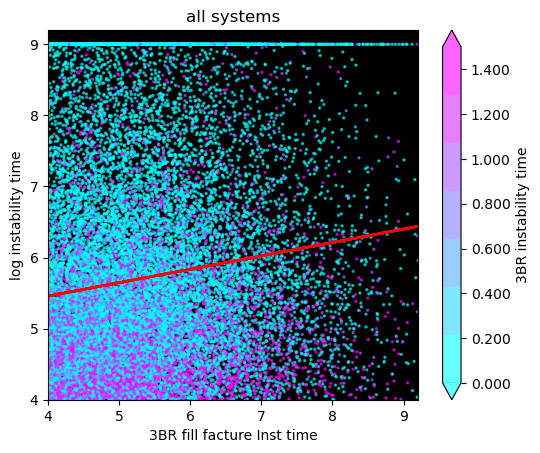

In [19]:
ax = plt.axes()
plt.scatter((noNan['logInstT3BR']),np.log10(noNan['instability_time']), s=2, c=(np.log10(noNan['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.6)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

#plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([4,9.2])
ax.set_ylim([4,9.2])
ax.set_aspect('equal')
plt.xlabel("3BR fill facture Inst time")
plt.ylabel("log instability time")
plt.title("all systems")
cbar.set_label('3BR instability time')
ax.set_facecolor("black")


xn = (noNan['logInstT3BR'])
yn=np.log10(noNan['instability_time'])
z = np.polyfit(xn, yn, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(xn, p(xn),c='red')

In [20]:
temp=plot
temp['log'] = np.log10(plot['ThetaSTD']/1.8)

In [21]:
temp=temp.drop(temp[temp['log']<.25].index)
#temp=temp.drop(temp[temp['instability_time']>1e7].index)
#temp=temp.drop(temp[temp['threeBRfillfac']>1].index)



/tmp/ipykernel_126685/562612168.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((temp['threeBRfillfac']),np.log10(temp['instability_time']), s=2, c=((temp['log'])), cmap=plt.cm.get_cmap("cool",10),vmin=0,vmax=2,alpha=.8)


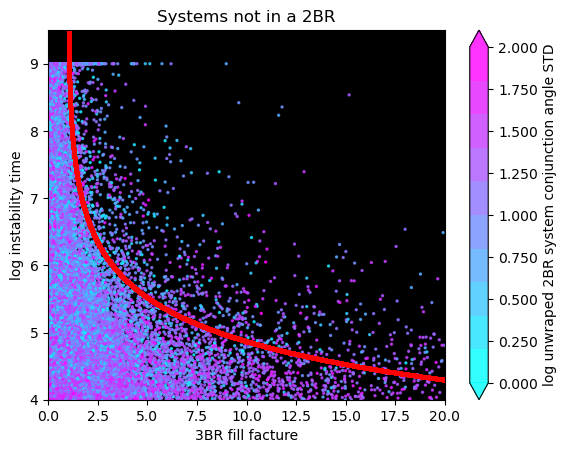

In [22]:
ax = plt.axes()
plt.scatter((temp['threeBRfillfac']),np.log10(temp['instability_time']), s=2, c=((temp['log'])), cmap=plt.cm.get_cmap("cool",10),vmin=0,vmax=2,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
plt.title("Systems not in a 2BR")
cbar.set_label('log unwraped 2BR system conjunction angle STD')
ax.set_facecolor("black")

/tmp/ipykernel_126685/4104607649.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((noNan['logInstT3BR']),np.log10(noNan['instability_time']), s=2, c=(np.log10(noNan['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.6)


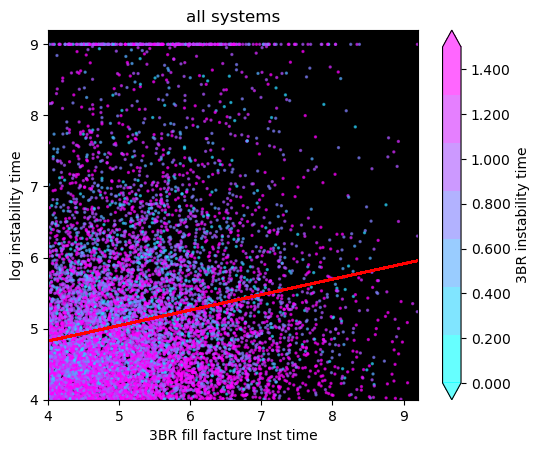

In [23]:
noNan = temp.drop(temp[temp['logInstT3BR'] <0].index)
ax = plt.axes()
plt.scatter((noNan['logInstT3BR']),np.log10(noNan['instability_time']), s=2, c=(np.log10(noNan['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.6)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

#plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([4,9.2])
ax.set_ylim([4,9.2])
ax.set_aspect('equal')
plt.xlabel("3BR fill facture Inst time")
plt.ylabel("log instability time")
plt.title("all systems")
cbar.set_label('3BR instability time')
ax.set_facecolor("black")


xn = (noNan['logInstT3BR'])
yn=np.log10(noNan['instability_time'])
z = np.polyfit(xn, yn, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(xn, p(xn),c='red')

In [24]:
temp['failTest']=list(map(plotfill,temp['threeBRfillfac']))

/tmp/ipykernel_126685/1039464162.py:4: RuntimeWarning: invalid value encountered in log10
  p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
/tmp/ipykernel_126685/1039464162.py:5: RuntimeWarning: invalid value encountered in log
  p2 = math.sqrt(-np.log(1-(x**(-1))))


In [25]:
temp=temp.drop(temp[temp['threeBRfillfac']<=2].index)
temp=temp.drop(temp[np.log10(temp['instability_time'])<9].index)


In [26]:
temp

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,ThetaSTD,p2/1,p3/2,logInstT3BR,...,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup,log,failTest
388,388,2.006894,0.002350,2.519206,0.024593,0.086079,9.030116,1.863346,1.089194,4.566752,...,0.514244,0.602997,True,True,1.000013e+09,1.000013e+09,0,False,0.700421,6.328917
1161,1161,2.117436,0.072220,2.553010,0.052845,0.047933,3.785120,2.576656,1.121849,4.088616,...,0.879483,1.029217,True,True,1.000039e+09,1.000039e+09,0,False,0.322807,6.310337
1975,1975,1.980868,0.001974,4.347759,0.024143,0.115881,12.114496,1.474543,1.048885,4.622554,...,0.295503,0.337386,True,True,1.000004e+09,2.531759e+08,0,False,0.828033,5.667356
3440,3440,2.004756,0.009338,3.313720,0.029898,0.268368,12.398360,1.727374,1.058063,4.752028,...,0.439652,0.494853,True,True,1.000010e+09,1.000010e+09,0,False,0.838092,5.974877
6770,6770,2.008273,0.003386,4.896673,0.146243,0.447694,6.365206,2.522073,1.094901,3.335449,...,0.852848,0.968293,True,True,1.000045e+09,1.000045e+09,0,False,0.548540,5.542302
6790,6790,2.001682,0.006539,2.353701,0.030214,0.001156,27.614970,1.460121,1.279341,3.462371,...,0.287072,0.516820,True,True,1.000000e+09,1.000000e+09,0,False,1.185872,6.426340
7546,7546,2.002751,0.000582,2.086572,0.011220,0.055389,4.545043,1.667966,1.074403,5.222904,...,0.406452,0.475377,True,True,1.000005e+09,1.000005e+09,0,False,0.402265,6.611996
7574,7574,1.998405,0.000979,5.124054,0.443428,0.026320,5.629661,2.588844,1.134252,2.814979,...,0.885428,1.050618,True,True,1.000040e+09,1.000040e+09,0,False,0.495210,5.495819
7576,7576,2.001204,0.000486,2.717475,0.022982,0.028937,13.179942,1.565223,1.072678,4.764436,...,0.348086,0.412638,True,True,1.000003e+09,6.912231e+08,0,False,0.864641,6.225410
9144,9144,1.997864,0.000391,2.076223,0.037297,0.016123,9.054079,1.715080,1.101078,4.768471,...,0.432814,0.527809,True,True,1.000004e+09,1.000004e+09,0,False,0.701572,6.620074


/tmp/ipykernel_126685/1820820156.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((temp['threeBRfillfac']),np.log10(temp['instability_time']), s=2, c=((temp['log'])), cmap=plt.cm.get_cmap("cool",10),vmin=0,vmax=2,alpha=.8)


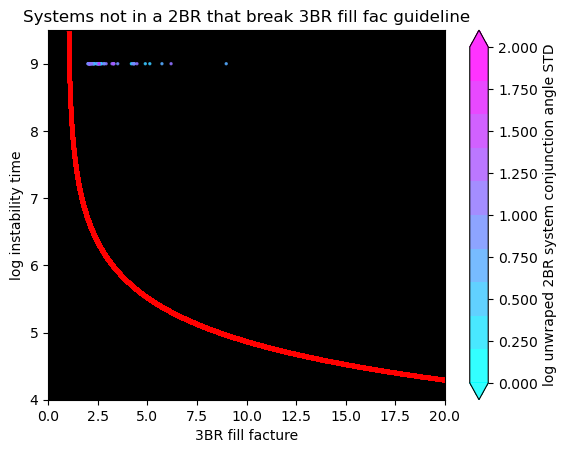

In [27]:
ax = plt.axes()
plt.scatter((temp['threeBRfillfac']),np.log10(temp['instability_time']), s=2, c=((temp['log'])), cmap=plt.cm.get_cmap("cool",10),vmin=0,vmax=2,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
plt.title("Systems not in a 2BR that break 3BR fill fac guideline")
cbar.set_label('log unwraped 2BR system conjunction angle STD')
ax.set_facecolor("black")

In [28]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import coPlotter

    #return figure
from multiprocessing import Pool

#%%

systems = temp['index']




if __name__ == "__main__":  # confirms that the code is under main function

  

    
    #bound = test = np.linspace(0, 138543, num=138544, endpoint=True, retstep=False, dtype=int, axis=0)
    with Pool(62) as p:
        p.map(coPlotter.get_plot, systems)

/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

In [29]:
findstd = []
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.pi+3*np.cos(x*100))

print(np.std(findstd))


2.1224617628594427


In [30]:
findstd=[]
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.mod(10*x,2*np.pi))

print(np.std(findstd))


1.8146636641196545
